In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Load the dataset
df = pd.read_csv(r'C:\Users\DAMILOLA\Videos\Financial _Statement.csv')

# Display the first few rows and the summary of the dataframe
print(df.head())
print(df.info())
print(df.describe())

        Date    ticker    net profit  net profit growth  \
0  5/14/2022  sh688235 -2.866345e+09            -965.90   
1  5/13/2022  sh688981  2.843451e+09             175.50   
2  5/12/2022  sh603185  6.548271e+08             108.15   
3  5/12/2022  sh600679  2.439685e+07              14.70   
4  5/10/2022  sz002765  5.033090e+07              25.42   

   total operating income  total operating income growth  \
0            1.947858e+09                     -50.422231   
1            1.185401e+10                      62.562718   
2            5.674230e+09                     252.617510   
3            4.139197e+08                     -23.395080   
4            7.650320e+08                      -0.227009   

   (total operating expense) operating expense  \
0                                 4.149990e+08   
1                                 6.973532e+09   
2                                 4.770776e+09   
3                                 3.465510e+08   
4                                 

In [9]:
# Data Cleaning

# Convert 'Date' column to datetime format
print('Converting Date column to datetime format...')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing values
print('Handling missing values...')
df = df.dropna()

# Remove duplicates
print('Removing duplicates...')
df = df.drop_duplicates()

# Standardize formats (e.g., rounding off financial metrics to 2 decimal places)
print('Standardizing formats...')
financial_columns = ['net profit', 'net profit growth', 'total operating income', 'total operating income growth',
                     '(total operating expense) operating expense', '(total operating expense) sales expense',
                     '(total operating expense) management expense', '(total opearting expense) financial expense',
                     '(total operating expense) total operating expense', 'net operating profit', 'total profit']
df[financial_columns] = df[financial_columns].round(2)

# Display the cleaned dataframe
print('Displaying cleaned dataframe...')
print(df.head())
print(df.info())
print(df.describe())



Converting Date column to datetime format...
Handling missing values...
Removing duplicates...
Standardizing formats...
Displaying cleaned dataframe...
        Date    ticker    net profit  net profit growth  \
0 2022-05-14  sh688235 -2.866345e+09            -965.90   
1 2022-05-13  sh688981  2.843451e+09             175.50   
2 2022-05-12  sh603185  6.548271e+08             108.15   
3 2022-05-12  sh600679  2.439685e+07              14.70   
4 2022-05-10  sz002765  5.033090e+07              25.42   

   total operating income  total operating income growth  \
0            1.947858e+09                         -50.42   
1            1.185401e+10                          62.56   
2            5.674230e+09                         252.62   
3            4.139197e+08                         -23.40   
4            7.650320e+08                          -0.23   

   (total operating expense) operating expense  \
0                                 4.149990e+08   
1                               

In [10]:
# Check for missing values
print(df.isnull().sum())

Date                                                 0
ticker                                               0
net profit                                           0
net profit growth                                    0
total operating income                               0
total operating income growth                        0
(total operating expense) operating expense          0
(total operating expense) sales expense              0
(total operating expense) management expense         0
(total opearting expense) financial expense          0
(total operating expense) total operating expense    0
net operating profit                                 0
total profit                                         0
dtype: int64


In [11]:
# Identify relevant EDA columns (Inflows and Outflows)
expense_columns = [
    '(total operating expense) operating expense',
    '(total operating expense) sales expense',
    '(total operating expense) management expense',
    '(total operating expense) financial expense'
]

inflow_columns = [
    'total operating income'
]

# Create a mapping document
mapping_document = {
    '(total operating expense) operating expense': 'Operational Costs',
    '(total operating expense) sales expense': 'Marketing Expenses',
    '(total operating expense) management expense': 'Management Expenses',
    '(total operating expense) financial expense': 'Financial Expenses',
    'total operating income': 'Sales Revenue'
}

# Categorize the data
df['Category'] = df.apply(lambda row: mapping_document[row.name] if row.name in mapping_document else 'Other', axis=1)

print("Data categorization completed.")

Data categorization completed.


In [12]:
# Summarize the data
expense_summary = df[expense_columns].sum()
inflow_summary = df[inflow_columns].sum()

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=expense_summary.index, y=expense_summary.values)
plt.title('Distribution of Expenses')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=inflow_summary.index, y=inflow_summary.values)
plt.title('Distribution of Inflows')
plt.xlabel('Inflow Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

print("Exploratory Data Analysis completed.")

KeyError: "['(total operating expense) financial expense'] not in index"

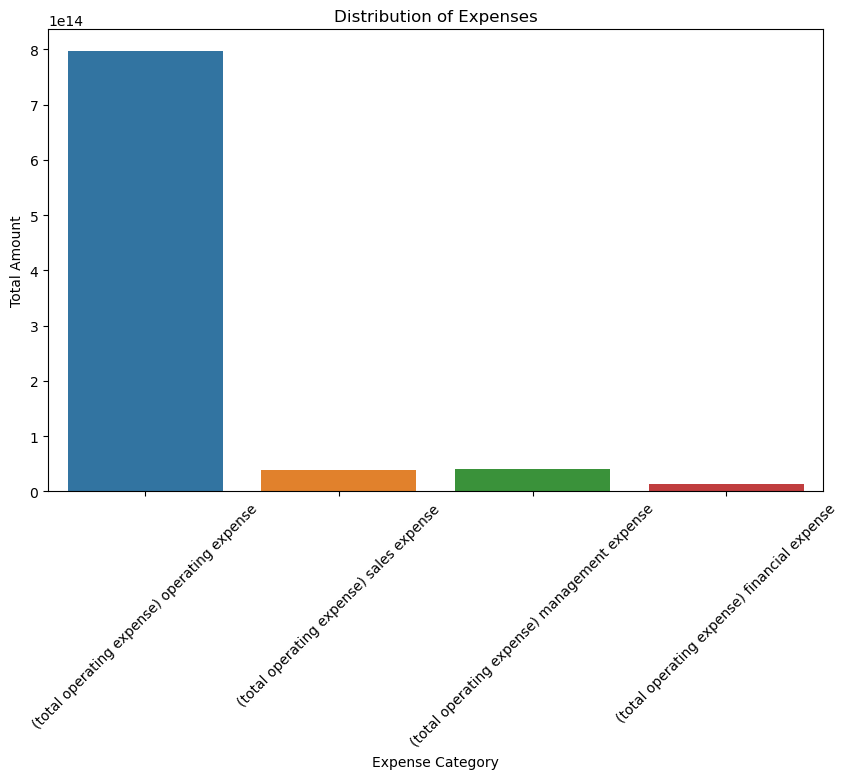

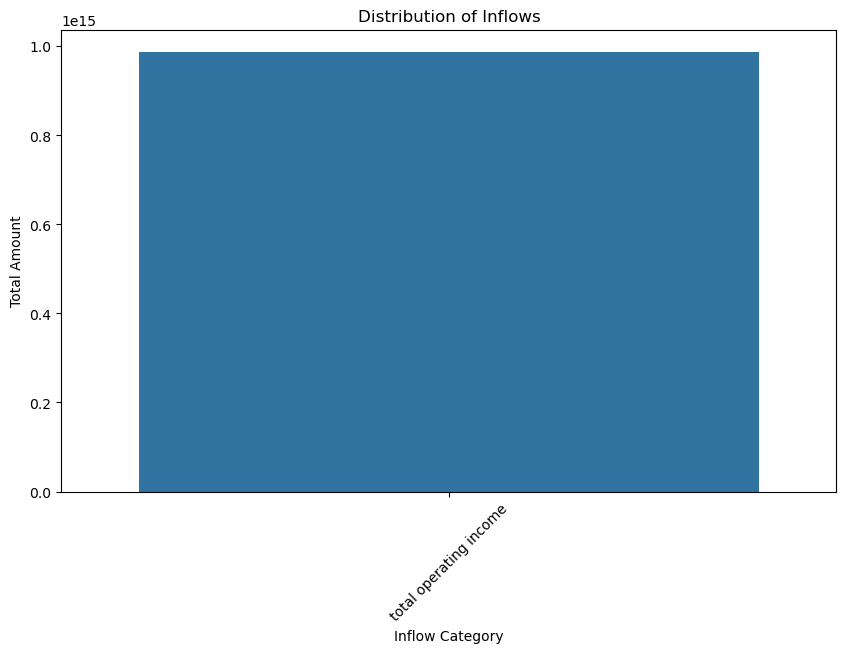

Exploratory Data Analysis completed.


In [13]:
df.rename(columns={'(total opearting expense) financial expense': '(total operating expense) financial expense'}, inplace=True)

# Summarize the data
expense_summary = df[expense_columns].sum()
inflow_summary = df[inflow_columns].sum()

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=expense_summary.index, y=expense_summary.values)
plt.title('Distribution of Expenses')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=inflow_summary.index, y=inflow_summary.values)
plt.title('Distribution of Inflows')
plt.xlabel('Inflow Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

print("Exploratory Data Analysis completed.")

In [14]:
# Calculate basic statistics
basic_stats = df.describe()
print("Basic Statistics:\n", basic_stats)

Basic Statistics:
          net profit  net profit growth  total operating income  \
count  1.814420e+05       1.814420e+05            1.814420e+05   
mean   2.744898e+08       4.441743e+01            5.444797e+09   
std    2.030942e+09       3.450869e+03            4.456774e+10   
min   -6.400331e+10      -1.418253e+05           -3.607330e+08   
25%    1.277625e+07      -2.508000e+01            2.997669e+08   
50%    5.124823e+07       1.218000e+01            7.922011e+08   
75%    1.558480e+08       5.401000e+01            2.322091e+09   
max    1.458670e+11       1.043858e+06            2.959800e+12   

       total operating income growth  \
count                   1.814420e+05   
mean                    1.136842e+02   
std                     1.683106e+04   
min                    -1.587700e+02   
25%                    -3.240000e+00   
50%                     1.206000e+01   
75%                     3.122000e+01   
max                     6.998082e+06   

       (total operating e

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_10440\3850921827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                                                    net profit  \
net profit                                           1.000000   
net profit growth                                    0.010994   
total operating income                               0.724397   
total operating income growth                       -0.000624   
(total operating expense) operating expense          0.682184   
(total operating expense) sales expense              0.622584   
(total operating expense) management expense         0.766898   
(total operating expense) financial expense          0.435716   
(total operating expense) total operating expense    0.696040   
net operating profit                                 0.979362   
total profit                                         0.986593   

                                                   net profit growth  \
net profit                                                  0.010994   
net profit growth                                     

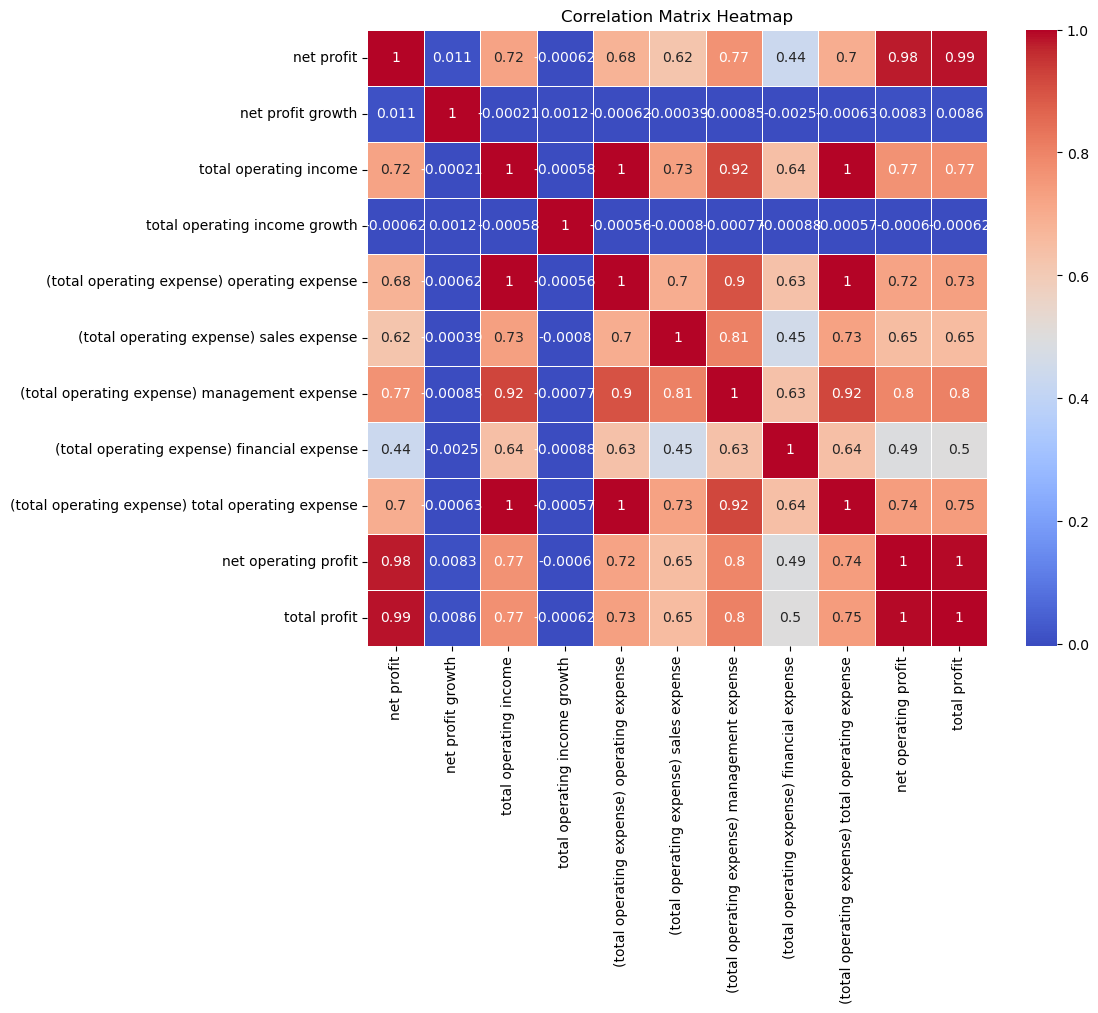

In [17]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

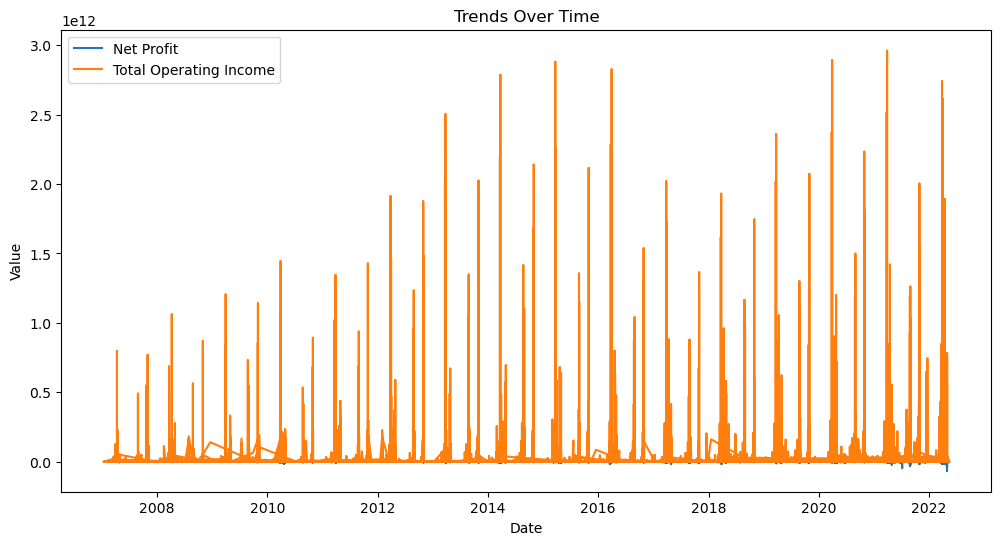

In [20]:
# Line plot for trends in key metrics over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['net profit'], label='Net Profit')
plt.plot(df['Date'], df['total operating income'], label='Total Operating Income')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.show()